In [2]:
# Get the libraries necessary
import sklearn.datasets as datasets

# For pretty plots
import matplotlib.pyplot as plt

# For data stuff
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# Literally for building a string that I could have just typed out
import os

# For fancy numbers
import numpy as np

import seaborn as sns

# Scikit Learn stuff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
datapath = os.path.join('datasets','diabetes','')
print(datapath)

datasets/diabetes/


In [4]:
df = pd.read_csv(datapath + 'diabetes.txt', delimiter='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.10,101.00,157,93.20,38.00,4.00,4.86,87,151
1,48,1,21.60,87.00,183,103.20,70.00,3.00,3.89,69,75
2,72,2,30.50,93.00,156,93.60,41.00,4.00,4.67,85,141
3,24,1,25.30,84.00,198,131.40,40.00,5.00,4.89,89,206
4,50,1,23.00,101.00,192,125.40,52.00,4.00,4.29,80,135


In [5]:
df.Y.describe()
# mean Y 152.13
# std Y  77.09
# min Y  25.00
# max Y  346.00

count   442.00
mean    152.13
std      77.09
min      25.00
25%      87.00
50%     140.50
75%     211.50
max     346.00
Name: Y, dtype: float64

In [6]:
df.AGE.describe()
# mean AGE 48.52
# std AGE  13.11
# min AGE  19.00
# max AGE  79.00

count   442.00
mean     48.52
std      13.11
min      19.00
25%      38.25
50%      50.00
75%      59.00
max      79.00
Name: AGE, dtype: float64

In [7]:
df.BMI.describe()
# mean BMI 26.38
# std BMI   4.42
# min BMI  18.00
# max BMI  42.20

count   442.00
mean     26.38
std       4.42
min      18.00
25%      23.20
50%      25.70
75%      29.28
max      42.20
Name: BMI, dtype: float64

In [8]:
df.BP.describe()
# mean BMI  94.65
# std BMI   13.83
# min BMI   62.00
# max BMI  133.00

count   442.00
mean     94.65
std      13.83
min      62.00
25%      84.00
50%      93.00
75%     105.00
max     133.00
Name: BP, dtype: float64

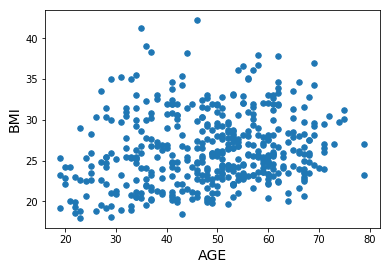

In [9]:
plt.scatter(df.AGE, df.BMI, s=30)
plt.xlabel('AGE', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.show()

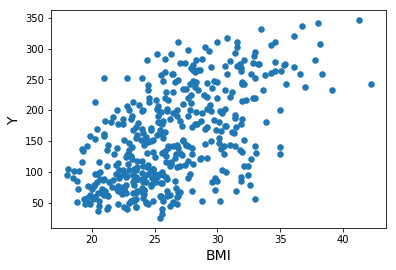

In [10]:
plt.scatter(df.BMI, df.Y, s=30)
plt.ylabel('Y', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.show()

/Users/matthewmello/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


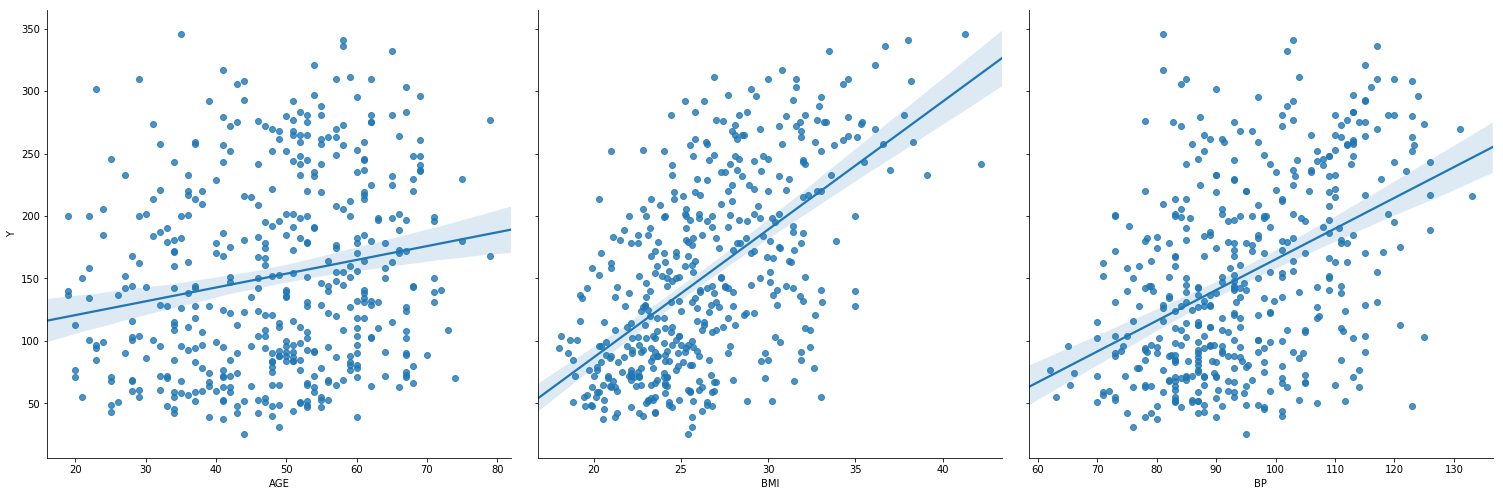

In [11]:
sns.pairplot(df, x_vars = ['AGE','BMI','BP'], y_vars = 'Y', height=7, kind ='reg')

In [12]:
diabetes = datasets.load_diabetes()

Coefficients: 
 [407.75511977]
Mean squared error: 4721.04
Variance score: 0.22


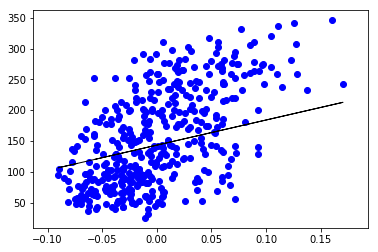

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:20]
diabetes_X_test = diabetes_X[20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:20]
diabetes_y_test = diabetes.target[20:]

# fit the data
regr.fit(diabetes_X_train, diabetes_y_train)
                                      
diabetes_y_pred = regr.predict(diabetes_X_test)
# print(y_pred)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='blue')
plt.plot(diabetes_X_test, diabetes_y_pred, color='black', linewidth=1)

plt.show()